In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')

In [3]:
from src.data.dataset2d import PancreasDataset2D
from src.utils.visualization import visualize_sample, visualize_label_mask

# __Raw dataset__

## `load_into_memory=False`

In [4]:
DATA_DIR = 'data/processed/test/train'
train_ds = PancreasDataset2D(
    data_dir=DATA_DIR
)

📊 Loading dataset... 55 slices found.


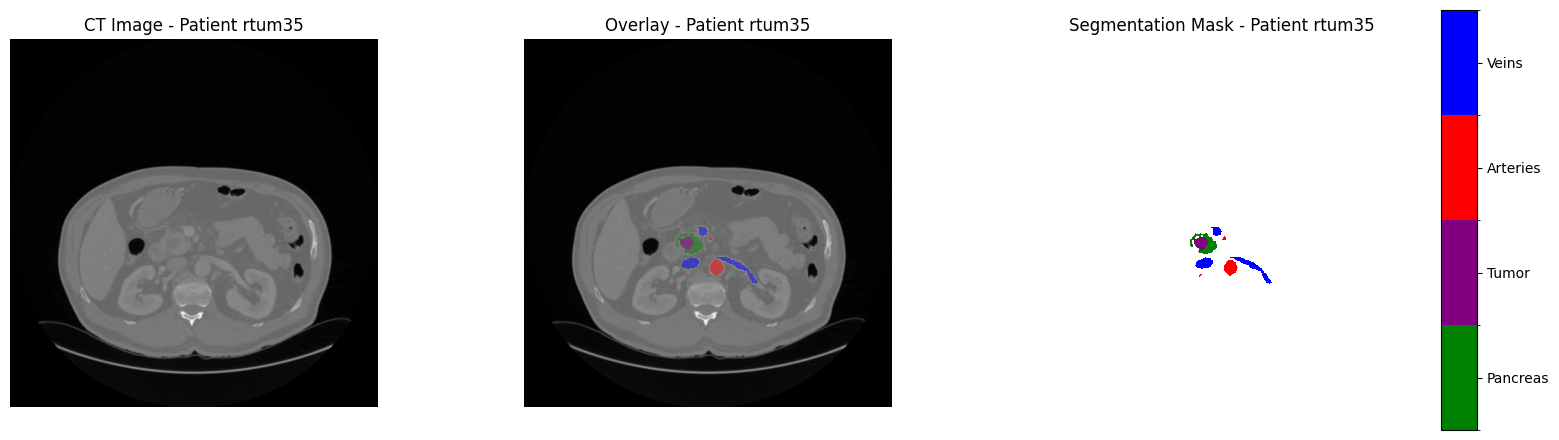

In [5]:
visualize_sample(train_ds, 28, alpha=0.5, zoom=0.0)

## `load_into_memory=True`

In [6]:
train_ds = PancreasDataset2D(
    data_dir=DATA_DIR,
    load_into_memory=True
)

📊 Loading dataset... 55 slices found.
✅ Dataset loaded. 55 slices loaded.


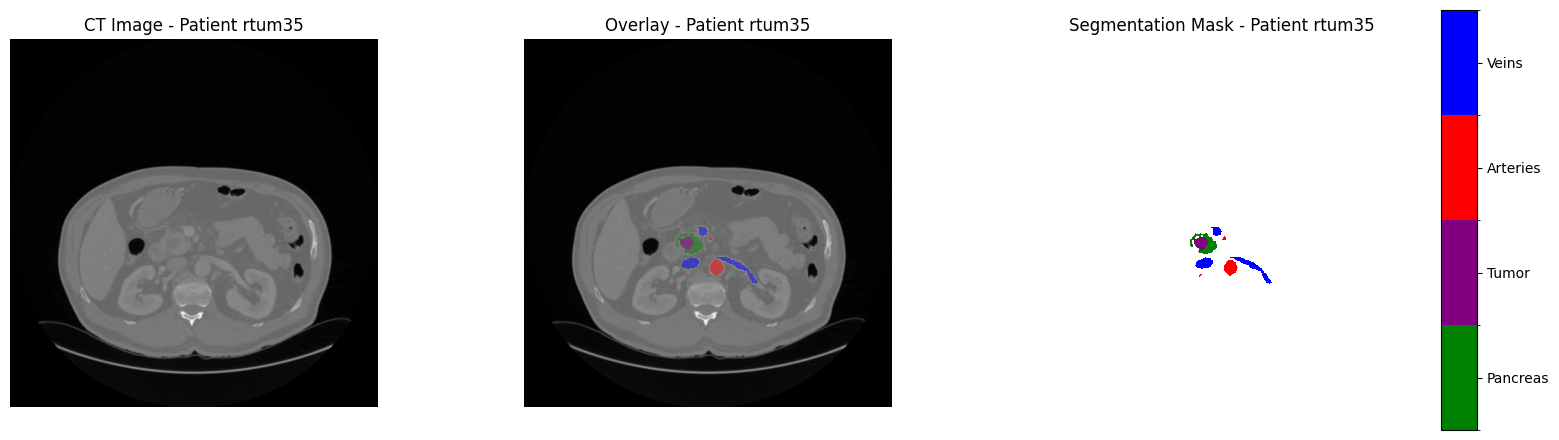

In [7]:
visualize_sample(train_ds, 28, alpha=0.5, zoom=0.0)

# __Transforms__ and __augmentations__

In [8]:
from src.utils.config import load_config
from src.data.transforms import build_transforms_from_config
from src.data.augmentation import build_augmentations_from_config

In [9]:
transforms_config = load_config('configs/experiments/one_deep.yaml').get('transforms', None)
print(transforms_config)
aug_config = load_config('configs/experiments/one_deep.yaml').get('augmentations', None)
print(aug_config)
transforms = build_transforms_from_config(transforms_config)
augment = build_augmentations_from_config(aug_config)

[{'ApplyWindow': {'window_level': 50, 'window_width': 400}}, {'Normalize': {}}, {'CropBorders': {'crop_size': 120}}, {'Resize': {'size': [8, 8]}}, {'ToTensor': {}}]
[{'Affine': {'scale': [0.95, 1.05], 'translate_percent': [0.02, 0.02], 'rotate': [-10, 10], 'p': 0.2}}, {'RandomBrightnessContrast': {'brightness_limit': 0.2, 'contrast_limit': 0.2, 'p': 0.3}}, {'GaussianBlur': {'blur_limit': [3, 7], 'p': 0.3}}, {'ElasticTransform': {'alpha': 1.0, 'sigma': 50, 'p': 0.3}}, {'GridDistortion': {'num_steps': 5, 'distort_limit': 0.3, 'p': 0.3}}, {'ToTensorV2': {}}]


## Transforms

In [10]:
tf_dataset = PancreasDataset2D(
    data_dir=DATA_DIR,
    transform=transforms,
    augment=None
)

📊 Loading dataset... 55 slices found.


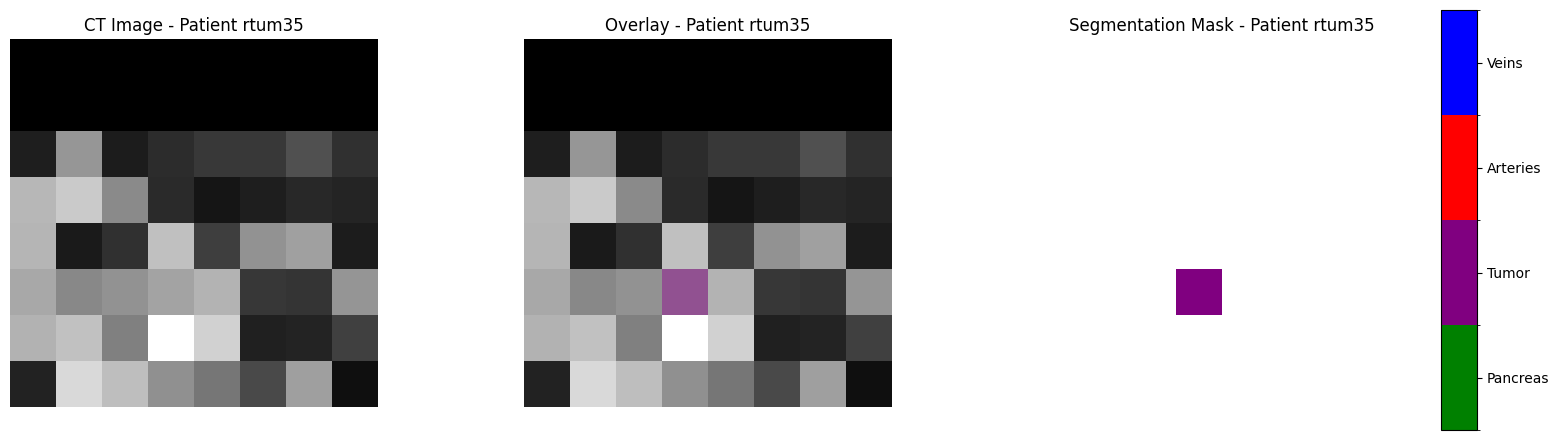

In [11]:
visualize_sample(tf_dataset, 28, alpha=0.5, zoom=0.0)

## Augmentations

In [12]:
au_dataset = PancreasDataset2D(
    data_dir=DATA_DIR,
    transform=None,
    augment=augment
)

📊 Loading dataset... 55 slices found.


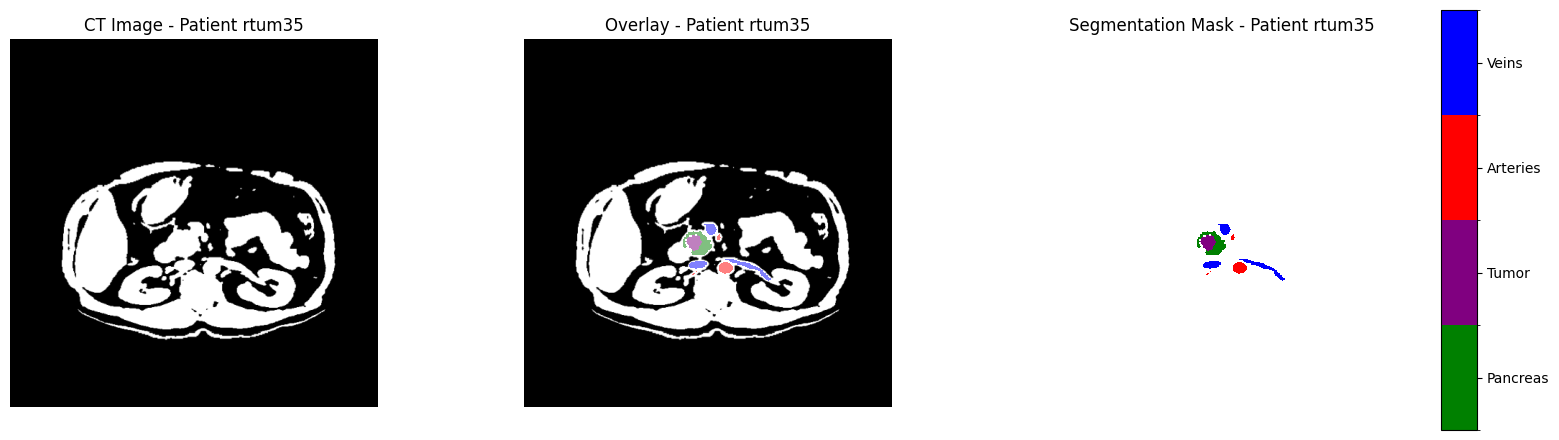

In [13]:
visualize_sample(au_dataset, 28, alpha=0.5, zoom=0.0)

## Transforms and augmentations

In [14]:
dataset = PancreasDataset2D(
    data_dir=DATA_DIR,
    transform=transforms,
    augment=augment
)

📊 Loading dataset... 55 slices found.


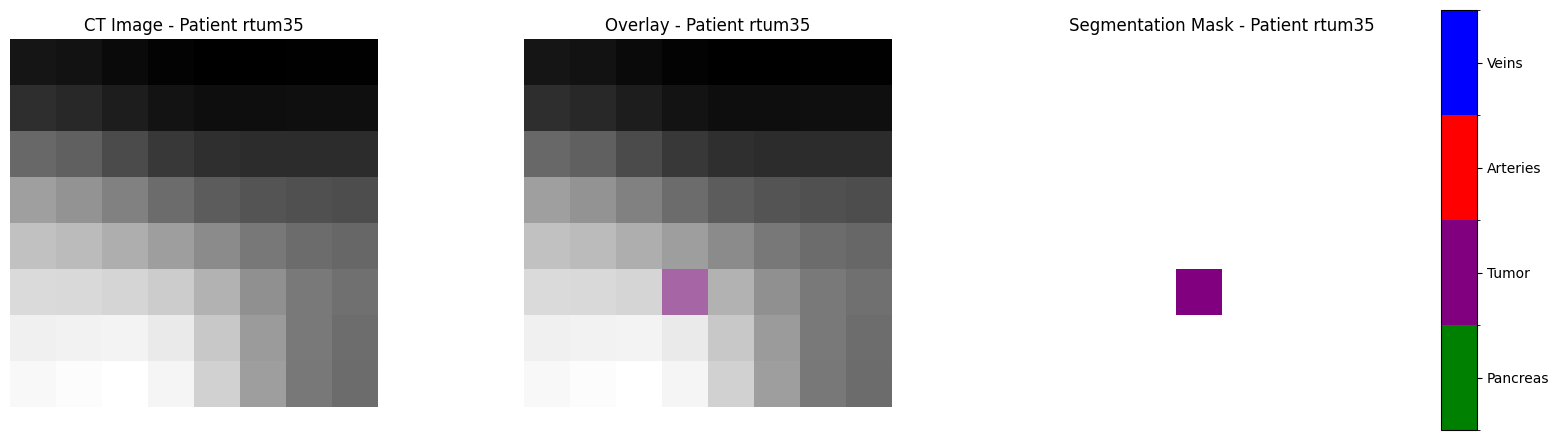

In [15]:
visualize_sample(dataset, 28, alpha=0.5, zoom=0.0)

# __Comparing Dataset__

In [16]:
from src.data.dataset import PancreasDataset

In [17]:
ds = PancreasDataset(
    data_dir='data/raw/',
    split_file='data/splits/one.json',
    split_type='train',
    transform=transforms,
    augment=augment
)

📊 Loading dataset (train)... 1 patients found.
📊 Dataset loaded with 55 slices.


In [18]:
DATASETS = [train_ds, tf_dataset, au_dataset, dataset, ds]
for D in DATASETS:
    image, mask, _ = D[28]
    print(f"{D}")
    print(f"\timage: {image.shape}")
    print(f"\tmask: {mask.shape}")

	image: torch.Size([1, 512, 512])
	mask: torch.Size([512, 512])
	image: torch.Size([1, 8, 8])
	mask: torch.Size([8, 8])
	image: torch.Size([1, 512, 512])
	mask: torch.Size([512, 512])
	image: torch.Size([1, 8, 8])
	mask: torch.Size([8, 8])
	image: torch.Size([1, 8, 8])
	mask: torch.Size([8, 8])
